# Modules

In [1]:
#Load Modules
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
# from plotly
import plotly.graph_objects as go
import pandas as pd

# Classes

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Brownian Motion 1-D

Using Wiener process

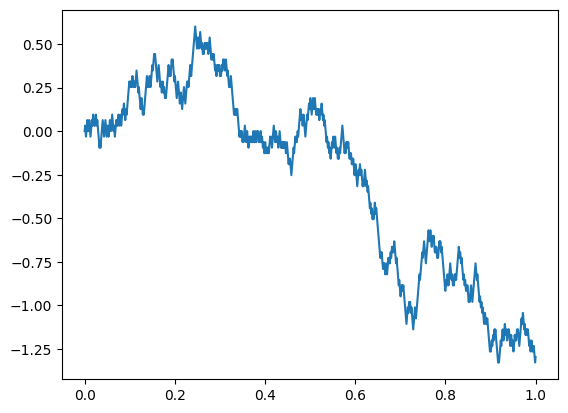

In [3]:
# Init parameters
s_pos = 0
n_steps = 1000

# Init Brownian walk vector
bw = np.ones(n_steps)*s_pos
# Generate the trajectory
for i in range(1, n_steps):
    di = np.random.choice([1,-1])
    # Wiener process
    bw[i] = bw[i-1]+(di/np.sqrt(n_steps))
    # axu vector for time
times = np.linspace(0,1,n_steps)

plt.plot(times, bw)
plt.show()